In [2]:
#Let's import required packages
import pandas as pd
import numpy as np
#Data Visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
# Algorithms
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In C:\Users\afais\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\afais\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\afais\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\afais\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\afais\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [69]:
wine=pd.read_csv("winequality-white.csv", sep = ';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [70]:
#to know shape of the dataset
wine.shape

(4898, 12)

In [71]:
#Number of unique valuesin this dataset
for col in wine.columns.values:
    print("Number of unique values of {}:{}".format(col,wine[col].nunique()))

Number of unique values of fixed acidity:68
Number of unique values of volatile acidity:125
Number of unique values of citric acid:87
Number of unique values of residual sugar:310
Number of unique values of chlorides:160
Number of unique values of free sulfur dioxide:132
Number of unique values of total sulfur dioxide:251
Number of unique values of density:890
Number of unique values of pH:103
Number of unique values of sulphates:79
Number of unique values of alcohol:103
Number of unique values of quality:7


In [72]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [73]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Exploratory Data Analysis

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

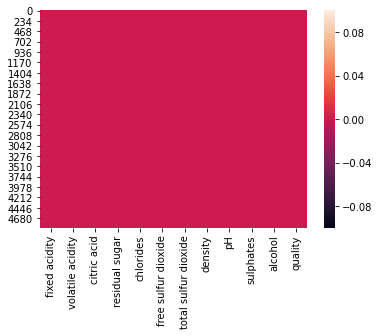

In [74]:
#check for null values
sns.heatmap(wine.isnull())
wine.isnull().sum()

<AxesSubplot:xlabel='quality', ylabel='count'>

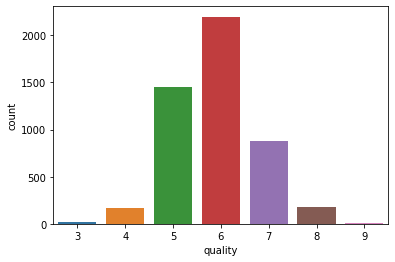

In [75]:
sns.countplot(wine['quality'])

In [76]:
#Let's create bins for to change the level of quaility into two categories
#'Bad' and 'Good'
bins=(2,5,9)
group=['Bad','Good']
wine['quality']=pd.cut(wine['quality'],bins=bins,labels=group)#now assign kabels to quality
label_quality=LabelEncoder()#Bad becomes 0,and good becomes 1
wine['quality']=label_quality.fit_transform(wine['quality'])

In [77]:
wine['quality'].value_counts()

1    3258
0    1640
Name: quality, dtype: int64

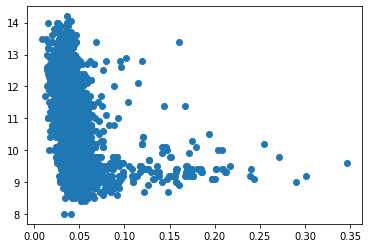

In [78]:
plt.scatter(wine['chlorides'],wine['alcohol'],cmap='orange')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.089749
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.225440
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.000700
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.092756
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.183939
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,-0.001278
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.170924
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.268696
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.083687
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.051858


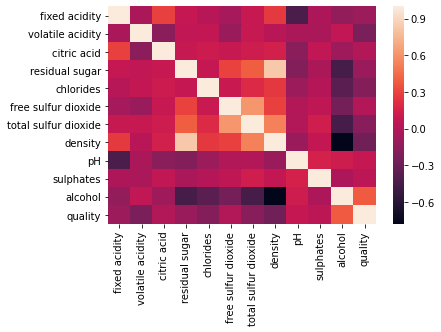

In [79]:
#to check correlation
sns.heatmap(wine.corr())
wine.corr()

In [80]:
#Let's drop pH column from data to remove the multicolinearity
wine.drop('pH',axis=1,inplace=True)

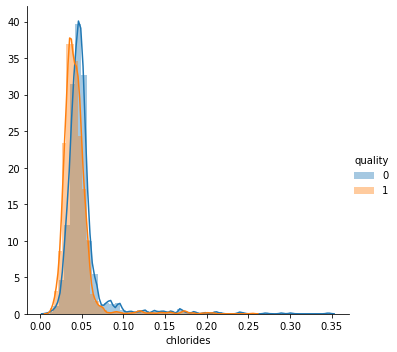

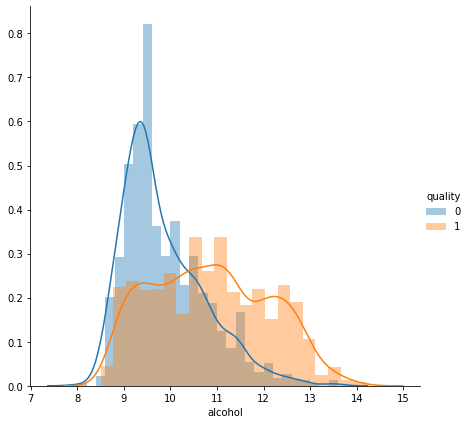

In [81]:
#distribution plots
sns.FacetGrid(wine,hue='quality',size=5).map(sns.distplot,'chlorides').add_legend()
sns.FacetGrid(wine,hue='quality',size=6).map(sns.distplot,'alcohol').add_legend()

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

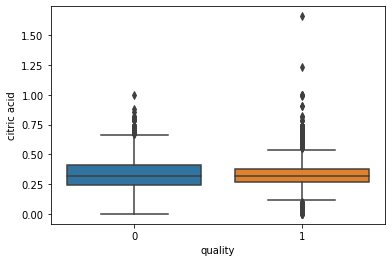

In [82]:
#boxplot for to check outliers
sns.boxplot(x='quality',y='citric acid',data=wine)

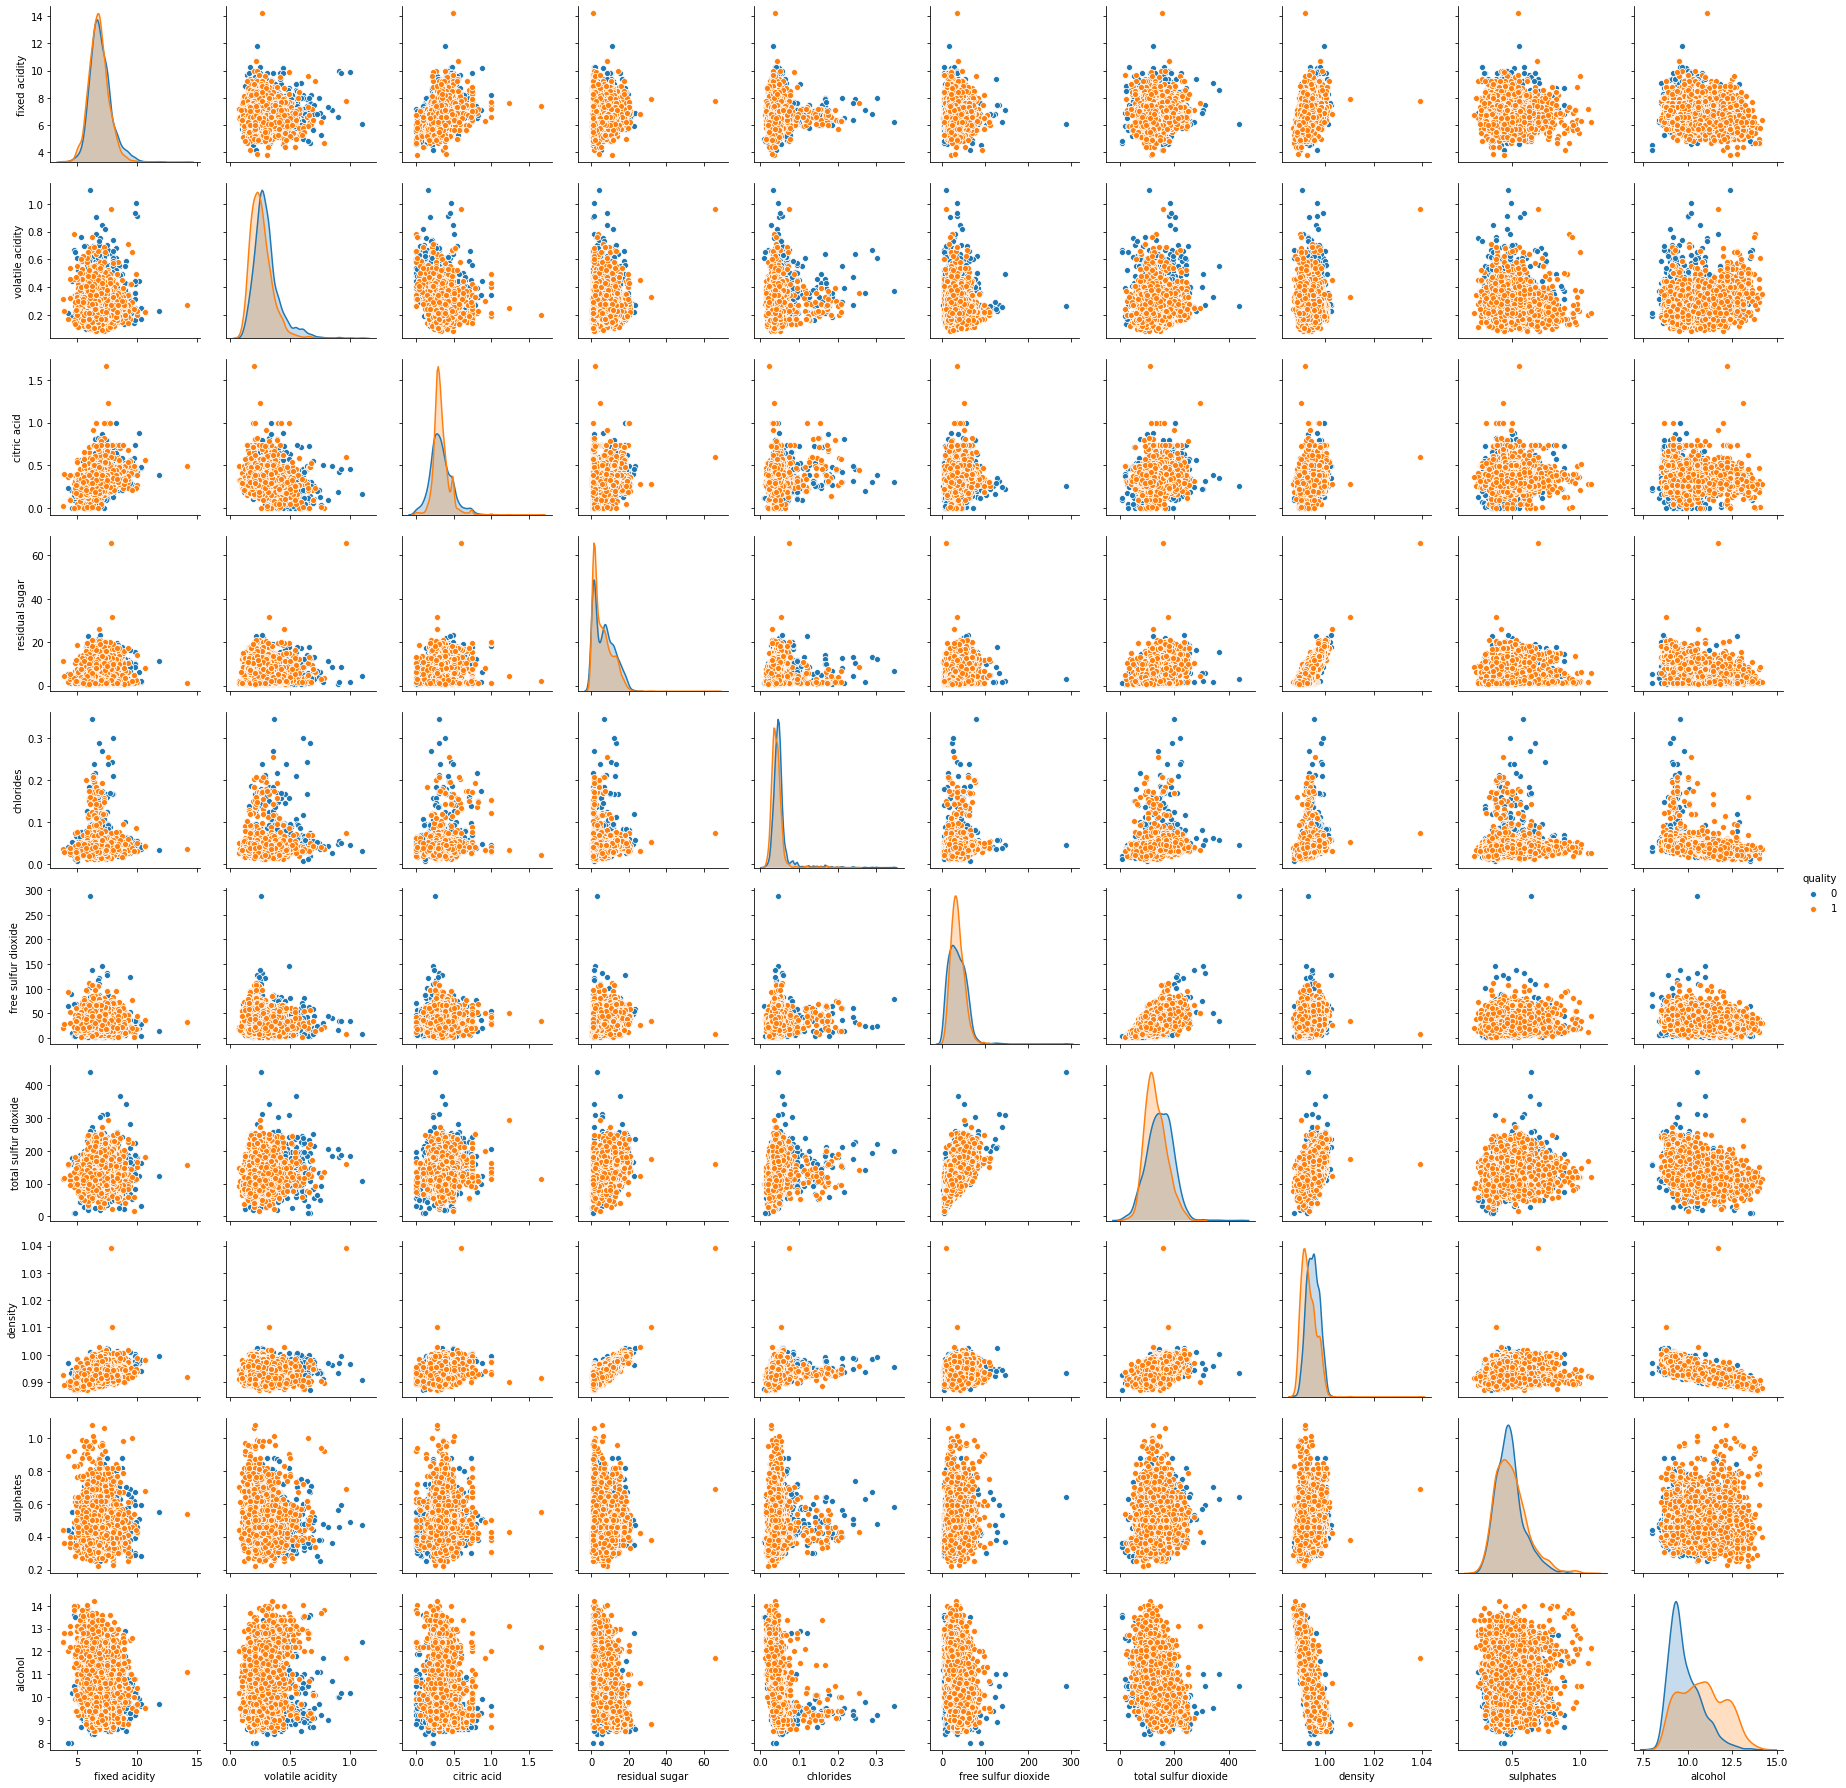

In [83]:
sns.pairplot(wine ,hue ='quality', vars =['fixed acidity','volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol'])

# Identification and Removal of Outliers

<AxesSubplot:>

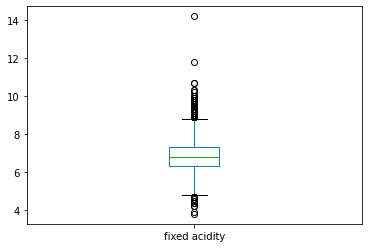

In [84]:
wine['fixed acidity'].plot.box()

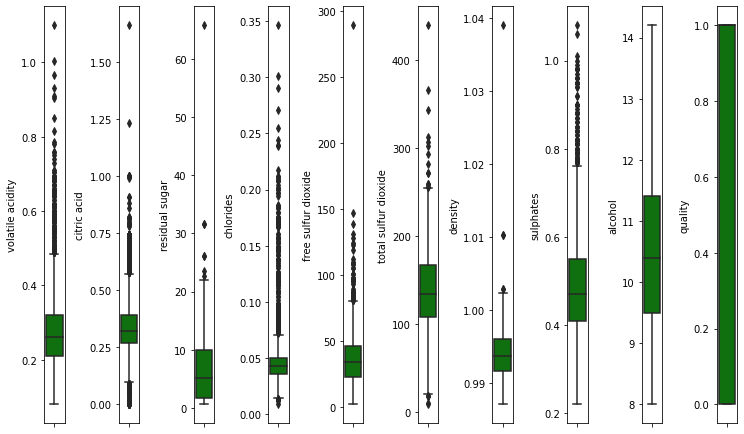

In [85]:
collist=wine.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(wine[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [86]:
#Removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(wine))
z
threshold=3
np.where(z>3)

(array([  17,   20,   23,   40,   41,   54,   98,  147,  154,  169,  178,
         182,  191,  194,  195,  196,  207,  207,  221,  227,  230,  268,
         269,  271,  294,  296,  315,  325,  325,  339,  358,  372,  395,
         405,  450,  470,  484,  508,  525,  531,  556,  600,  646,  659,
         683,  687,  687,  700,  729,  745,  757,  758,  759,  771,  772,
         775,  821,  852,  854,  859,  866,  873,  877,  878,  926,  946,
         948,  974,  979,  979,  980,  980, 1016, 1024, 1029, 1034, 1034,
        1036, 1040, 1051, 1051, 1053, 1123, 1124, 1152, 1158, 1163, 1171,
        1178, 1180, 1214, 1217, 1217, 1228, 1239, 1245, 1245, 1254, 1254,
        1257, 1263, 1272, 1282, 1293, 1294, 1304, 1304, 1307, 1309, 1312,
        1326, 1369, 1369, 1372, 1373, 1386, 1394, 1401, 1417, 1418, 1419,
        1423, 1423, 1436, 1440, 1445, 1455, 1457, 1458, 1460, 1465, 1476,
        1487, 1488, 1489, 1496, 1504, 1507, 1511, 1525, 1526, 1530, 1534,
        1540, 1551, 1551, 1560, 1563, 

In [87]:
wine_new=wine[(z<3).all(axis=1)]
wine_new.shape
wine.shape

(4898, 11)

# Check and removal of distribution of skewness

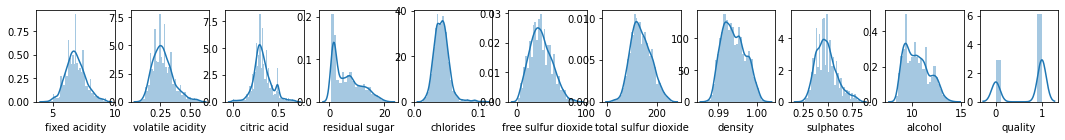

In [88]:
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(wine_new[collist[i]])

In [89]:
wine_new.skew()

fixed acidity           0.290183
volatile acidity        0.752509
citric acid             0.438458
residual sugar          0.712425
chlorides               1.045442
free sulfur dioxide     0.363268
total sulfur dioxide    0.268405
density                 0.258312
sulphates               0.641185
alcohol                 0.443780
quality                -0.767567
dtype: float64

In [90]:
wine_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,1


In [91]:
wine_new.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,0.50,11.2,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,0.46,9.4,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,0.38,12.8,1
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,0.32,11.8,1


In [92]:
x=wine_new.iloc[:,:-1]
y=wine_new.iloc[:,-1]

In [93]:
#removal of skew-ness using log transformation
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [94]:
x.skew()

fixed acidity           0.290183
volatile acidity        0.553774
citric acid             0.438458
residual sugar         -0.021740
chlorides               0.974628
free sulfur dioxide     0.363268
total sulfur dioxide    0.268405
density                 0.258312
sulphates               0.450517
alcohol                 0.443780
dtype: float64

# Let's Build Machine Learning Model

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [96]:
#Applying Standard Scaling to get optimized result
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [97]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lg=LogisticRegression()
knc=KNeighborsClassifier()
sgc=SGDClassifier()

In [98]:
seed=10
#prepare models
models=[]
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('KNeighborsClassifier',knc))
models.append(('SGDClassifier',sgc))
models.append(('LogisticRegression',lg))

************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 0.7706725468577729
Cross-val-score= 0.6663083116958893


              precision    recall  f1-score   support

           0       0.66      0.63      0.64       297
           1       0.82      0.84      0.83       610

    accuracy                           0.77       907
   macro avg       0.74      0.74      0.74       907
weighted avg       0.77      0.77      0.77       907



[[188 109]
 [ 99 511]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)
************** RandomForestClassifier ***********


RandomForestClassifier()


accuracy score 0.8467475192943771
Cross-val-score= 0.7603290836420924


              precision    recall  f1-score   support

           0       0.82      0.68      0.74       297
           1       0.86      0.93      0.89       610

    accuracy                           0.85       907
   macro avg       0.84      0.80      0.82       907
weighted avg       0.84      

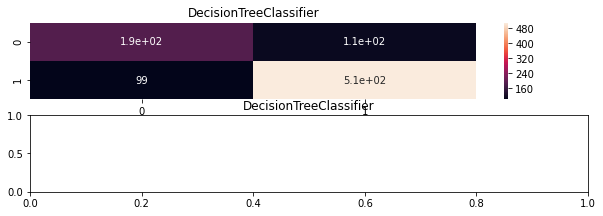

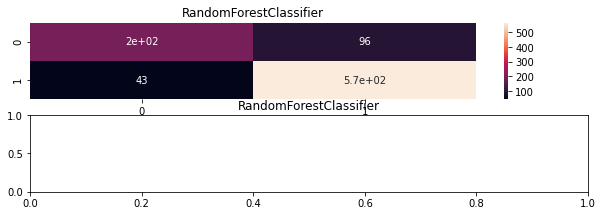

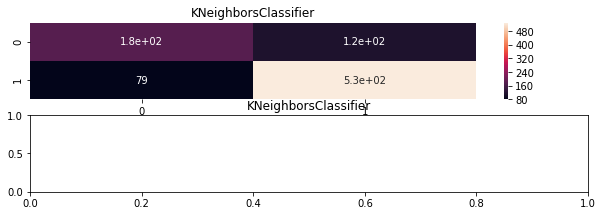

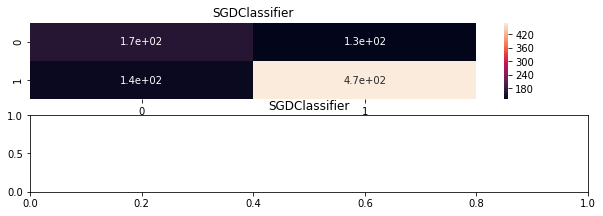

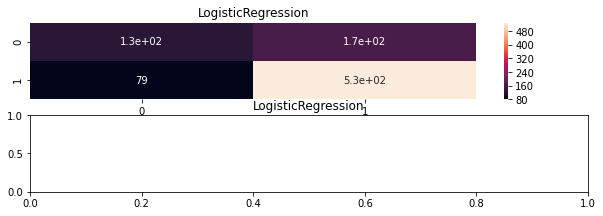

In [99]:
#evaluate each model in turn
Model=[]
cvs=[]
score=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    acc=accuracy_score(y_test,pred)
    print('accuracy score',acc)
    score.append(acc*100)
    kfold=model_selection.KFold(n_splits=10,random_state=seed, shuffle =True)
    cv=model_selection.cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross-val-score=',cv)
    cvs.append(cv*100)
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)


In [100]:
result=pd.DataFrame({'Model': Model, 'cvs': cvs, 'score': score}, columns=['Model', 'cvs', 'score'])
result

,Model,cvs,score
0,DecisionTreeClassifier,66.630831,77.067255
1,RandomForestClassifier,76.032908,84.674752
2,KNeighborsClassifier,66.608999,78.500551
3,SGDClassifier,63.873005,70.231533
4,LogisticRegression,73.870574,72.877619


In [101]:
#Random Forest is the best model here
#Let's introduce grid searchCV for parameter tuning
param_grid ={'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}
rfc = RandomForestClassifier(random_state=42)
grid=GridSearchCV(rfc,param_grid,cv=5)
model=grid.fit(x_train, y_train)
model.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [102]:
rfc1=RandomForestClassifier(random_state=43, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [103]:
rfc1.fit(x_train, y_train)
prediction=rfc1.predict(x_test)
print('predicted white wine quality:',prediction)
print('actual white wine quality',y_test)

predicted white wine quality: [1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1
 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1
 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1
 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1

In [104]:
acc=accuracy_score(y_test,prediction)
print('accuracy score',acc)

accuracy score 0.7938257993384785


In [107]:
importances = pd.DataFrame({'feature':x.columns,'importance':np.round(rfc1.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')


<AxesSubplot:xlabel='feature'>

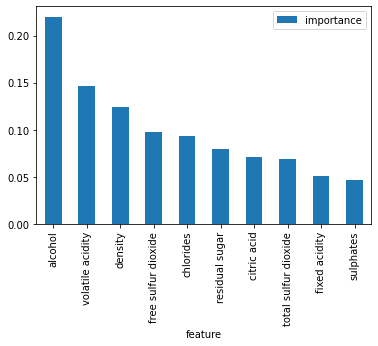

In [108]:
importances.plot.bar()

In [109]:
#Let's Drop free sulfur dioxide and retrain the model
wine.drop('sulphates',axis=1,inplace=True)

In [110]:
wine.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,11.2,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,9.4,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,12.8,1
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,11.8,1


In [111]:
wine_new=wine[(z<3).all(axis=1)]
wine_new.shape
wine.shape

(4898, 10)

In [112]:
x=wine_new.iloc[:,:-1]
y=wine_new.iloc[:,-1]

In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [114]:
#Applying Standard Scaling to get optimized result
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [115]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lg=LogisticRegression()
knc=KNeighborsClassifier()
sgc=SGDClassifier()

In [117]:
seed=15
#prepare models
models=[]
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('KNeighborsClassifier',knc))
models.append(('SGDClassifier',sgc))
models.append(('LogisticRegression',lg))

************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 0.7717750826901875
Cross-val-score= 0.6667454366873803


              precision    recall  f1-score   support

           0       0.66      0.64      0.65       297
           1       0.83      0.84      0.83       610

    accuracy                           0.77       907
   macro avg       0.74      0.74      0.74       907
weighted avg       0.77      0.77      0.77       907



[[190 107]
 [100 510]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


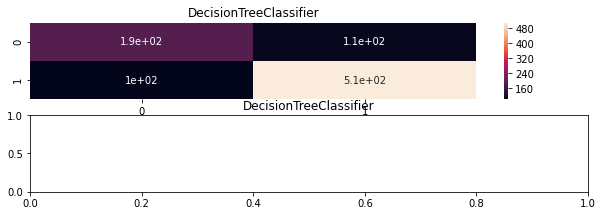

************** RandomForestClassifier ***********


RandomForestClassifier()


accuracy score 0.8412348401323043
Cross-val-score= 0.7632027306940514


              precision    recall  f1-score   support

           0       0.80      0.68      0.74       297
           1       0.86      0.92      0.89       610

    accuracy                           0.84       907
   macro avg       0.83      0.80      0.81       907
weighted avg       0.84      0.84      0.84       907



[[202  95]
 [ 49 561]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


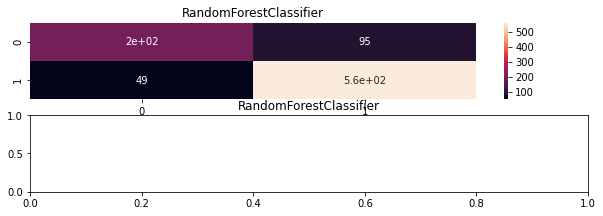

************** KNeighborsClassifier ***********


KNeighborsClassifier()


accuracy score 0.7805953693495039
Cross-val-score= 0.6671932588421778


              precision    recall  f1-score   support

           0       0.69      0.60      0.64       297
           1       0.82      0.87      0.84       610

    accuracy                           0.78       907
   macro avg       0.75      0.73      0.74       907
weighted avg       0.78      0.78      0.78       907



[[179 118]
 [ 81 529]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


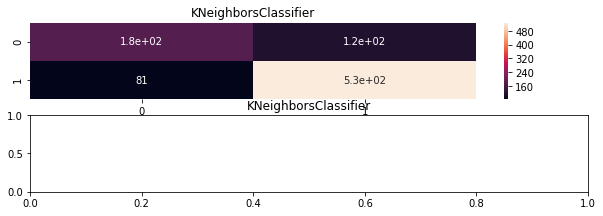

************** SGDClassifier ***********


SGDClassifier()


accuracy score 0.6934950385887542
Cross-val-score= 0.6010108819324911


              precision    recall  f1-score   support

           0       0.53      0.60      0.56       297
           1       0.79      0.74      0.76       610

    accuracy                           0.69       907
   macro avg       0.66      0.67      0.66       907
weighted avg       0.71      0.69      0.70       907



[[178 119]
 [159 451]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


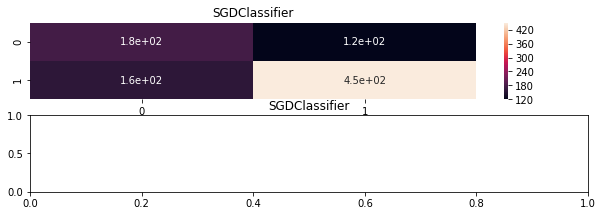

************** LogisticRegression ***********


LogisticRegression()


accuracy score 0.7309812568908489
Cross-val-score= 0.7400336474409468


              precision    recall  f1-score   support

           0       0.63      0.43      0.51       297
           1       0.76      0.88      0.81       610

    accuracy                           0.73       907
   macro avg       0.70      0.65      0.66       907
weighted avg       0.72      0.73      0.71       907



[[127 170]
 [ 74 536]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


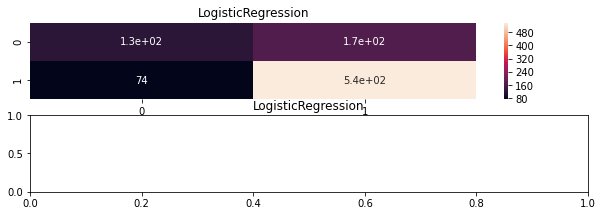

In [118]:
#evaluate each model in turn
Model=[]
cvs=[]
score=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    acc=accuracy_score(y_test,pred)
    print('accuracy score',acc)
    score.append(acc*100)
    kfold=model_selection.KFold(n_splits=10,random_state=seed, shuffle =True)
    cv=model_selection.cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross-val-score=',cv)
    cvs.append(cv*100)
    print('\n')
    
    print(classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.show()

In [119]:
result1=pd.DataFrame({'Model': Model, 'cvs': cvs, 'score': score}, columns=['Model', 'cvs', 'score'])
result1

,Model,cvs,score
0,DecisionTreeClassifier,66.674544,77.177508
1,RandomForestClassifier,76.320273,84.123484
2,KNeighborsClassifier,66.719326,78.059537
3,SGDClassifier,60.101088,69.349504
4,LogisticRegression,74.003365,73.098126


In [120]:
#Random Forest is the best model here
#Let's introduce grid searchCV for parameter tuning
param_grid ={'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}
rfc2 = RandomForestClassifier(random_state=42)
grid=GridSearchCV(rfc2,param_grid,cv=5)
model1=grid.fit(x_train, y_train)
model1.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [121]:
rfc2=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')

In [129]:
model=rfc2.fit(x_train, y_train)

In [130]:
pred=model.predict(x_test)

In [131]:
acc1=accuracy_score(y_test,pred)
print('accuracy score',acc1)

accuracy score 0.7938257993384785


In [132]:
import pickle


#Let's save the model in a file
file=open('random_forest_classifier_model.pkl', 'wb')# wb=write byte mode
#Dump this file 
pickle.dump(model, file)
infile = open('random_forest_classifier_model.pkl','rb')
new_dict = pickle.load(infile, encoding='latin1')


In [133]:
result=new_dict.predict([[7,0.27,0.36,20.7,0.045,170,1.0010,0.45,8.8]])
print(result)

[1]


<AxesSubplot:xlabel='quality'>

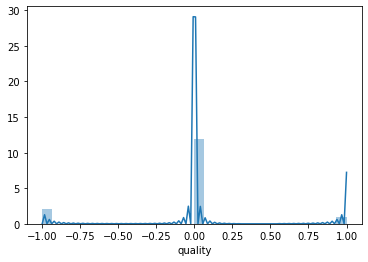

In [134]:
#This the classification model to predict red wine quality
#Check the model performance
sns.distplot(y_test-pred)

In [ ]:
#This the end-to-end project of White wine quality Classification